In [40]:
import pandas as pd

bg_cl_group = pd.read_parquet('Users/sethspielman/seth-aml/cluster-verification//data/usa.bg.cl.group.parquet')
bg_cl_type = pd.read_parquet('Users/sethspielman/seth-aml/cluster-verification//data/usa.bg.cl.type.parquet')
bg_inputs = pd.read_parquet('Users/sethspielman/seth-aml/cluster-verification/data/raw_data.parquet')
bg_eviction = pd.read_csv('Users/sethspielman/seth-aml/cluster-verification//data/bg_proprietary_2000_2018_v1.1.csv')

In [42]:
# for bg_cl_type sum the column filings by 'id' column
sum_filings = bg_eviction.groupby(['id'])['filings'].sum().to_frame()

In [43]:
# change index for bg_cl_group to column 'GEOID'
bg_cl_group.set_index('GEOID', inplace=True)
bg_cl_type.set_index('GEOID', inplace=True)
bg_inputs.set_index('GEOID', inplace=True)

In [44]:
# if the index of sum filings has a length of 11 digits add a leading zero
sum_filings.index = sum_filings.index.map(lambda x: '0' + str(x) if len(str(x)) == 11 else str(x))

In [45]:
#join bg_cl_group and sum_filings
bg_cl_group_filings = bg_cl_group.join(sum_filings)

In [46]:
# join bg_cl_type and sum_filings
bg_cl_type_filings = bg_cl_type.join(sum_filings)

In [47]:
# join column B25034_001 from bg_inputs to bg_cl_group_filings on using GEOID for bg_inputs and index for bg_cl_group_filings 
bg_cl_group_filings = bg_cl_group_filings.join(bg_inputs.B25034_001)
bg_cl_type_filings = bg_cl_type_filings.join(bg_inputs.B25034_001)


In [48]:
# find the number of items in the index of bg_cl_group and sum_filings that are the same
bg_cl_group_filings.index.isin(sum_filings.index).sum()

169305

In [49]:
bg_cl_group_filings['eviction_filing_rate'] = bg_cl_group_filings['filings'] / bg_cl_group_filings['B25034_001']
bg_cl_type_filings['eviction_filing_rate'] = bg_cl_type_filings['filings'] / bg_cl_type_filings['B25034_001']

<AxesSubplot:title={'center':'eviction_filing_rate'}, xlabel='cluster'>

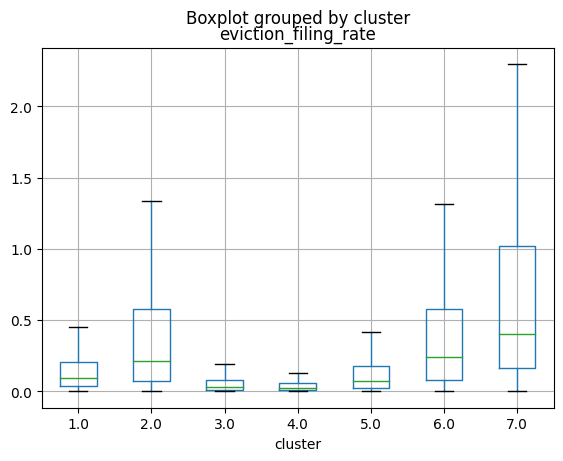

In [50]:
# make a boxplot of the column 'filings' from bg_cl_group_filings grouped by 'cluster' column do not display outliers
bg_cl_group_filings.boxplot(column='eviction_filing_rate', by='cluster', showfliers=False)

<AxesSubplot:title={'center':'eviction_filing_rate'}, xlabel='cluster'>

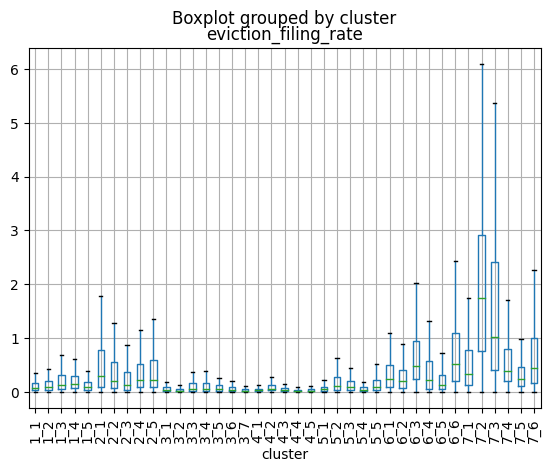

In [51]:
# make a boxplot of the column 'filings' from bg_cl_type_filings grouped by 'cluster' column do not display outliers rotate x-axis labels by 90 degrees
bg_cl_type_filings.boxplot(column='eviction_filing_rate', by='cluster', showfliers=False, rot=90)